In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import seaborn as sns
import os
from glob import iglob
FDRTHRESH = 0.05

In [39]:
# Load results from the D analysis
D   = pd.read_csv("/Volumes/doux/pdbmap/results/multiK_analysis_2016-08-17/hgmd_ar-exac/hgmd_ar-exac_D_summary.txt",delimiter='\t')
D   = D.drop_duplicates(["sid","chain"])
KAD = pd.read_csv("/Volumes/doux/pdbmap/results/multiK_analysis_2016-08-17/hgmd_ar-exac/hgmd_ar-exac_KAD_summary.txt",delimiter='\t')
KAD = KAD.drop_duplicates(["sid","chain"])
KBD = pd.read_csv("/Volumes/doux/pdbmap/results/multiK_analysis_2016-08-17/hgmd_ar-exac/hgmd_ar-exac_KBD_summary.txt",delimiter='\t')
KBD = KBD.drop_duplicates(["sid","chain"])

In [40]:
print "Number of structures evaluated:",
print len(D)

print "\nD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(D[D["p"]<0.01]),len(D[D["p"]<0.01]) / float(len(D)))
# print "Perm Z-Score: (%4d) %.4f"%(len(D[D["z_p"]<0.01]),len(D[D["z_p"]<0.01]) / float(len(D)))

print "\nKAD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(KAD[KAD["p"]<0.01]),len(KAD[KAD["p"]<0.01]) / float(len(KAD)))
# print "Perm Z-Score: (%4d) %.4f"%(len(KAD[KAD["z_p"]<0.01]),len(KAD[KAD["z_p"]<0.01]) / float(len(KAD)))

print "\nKBD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(KBD[KBD["p"]<0.01]),len(KBD[KBD["p"]<0.01]) / float(len(KBD)))
# print "Perm Z-Score: (%4d) %.4f"%(len(KBD[KBD["z_p"]<0.01]),len(KBD[KBD["z_p"]<0.01]) / float(len(KBD)))

Number of structures evaluated: 47

D Proportion with nominally significant unweighted p-values:
Permutation:  (  13) 0.2766

KAD Proportion with nominally significant unweighted p-values:
Permutation:  (  11) 0.2340

KBD Proportion with nominally significant unweighted p-values:
Permutation:  (  18) 0.3830


In [41]:
from qvalue import estimate

D['q'],D_lam,D_pi       = estimate(  D['p'].values)
KAD['q'],KAD_lam,KAD_pi = estimate(KAD['p'].values)
KBD['q'],KBD_lam,KBD_pi = estimate(KBD['p'].values)

print "Proteins passing an FDR of %.0f%% for K_HGMD_AR - K_exac"%(FDRTHRESH*100)
print "Permutation: %4d"%(D["q"]<FDRTHRESH).sum()

print "\nProteins passing an FDR of %.0f%% for K_HGMD_AR - K*"%(FDRTHRESH*100)
print "Permutation: %4d"%(KAD["q"]<FDRTHRESH).sum()

print "\nProteins passing an FDR of %.0f%% for K_exac - K*"%(FDRTHRESH*100)
print "Permutation: %4d"%(KBD["q"]<FDRTHRESH).sum()

Proteins passing an FDR of 5% for K_HGMD_AR - K_exac
Permutation:   13

Proteins passing an FDR of 5% for K_HGMD_AR - K*
Permutation:   11

Proteins passing an FDR of 5% for K_exac - K*
Permutation:   21


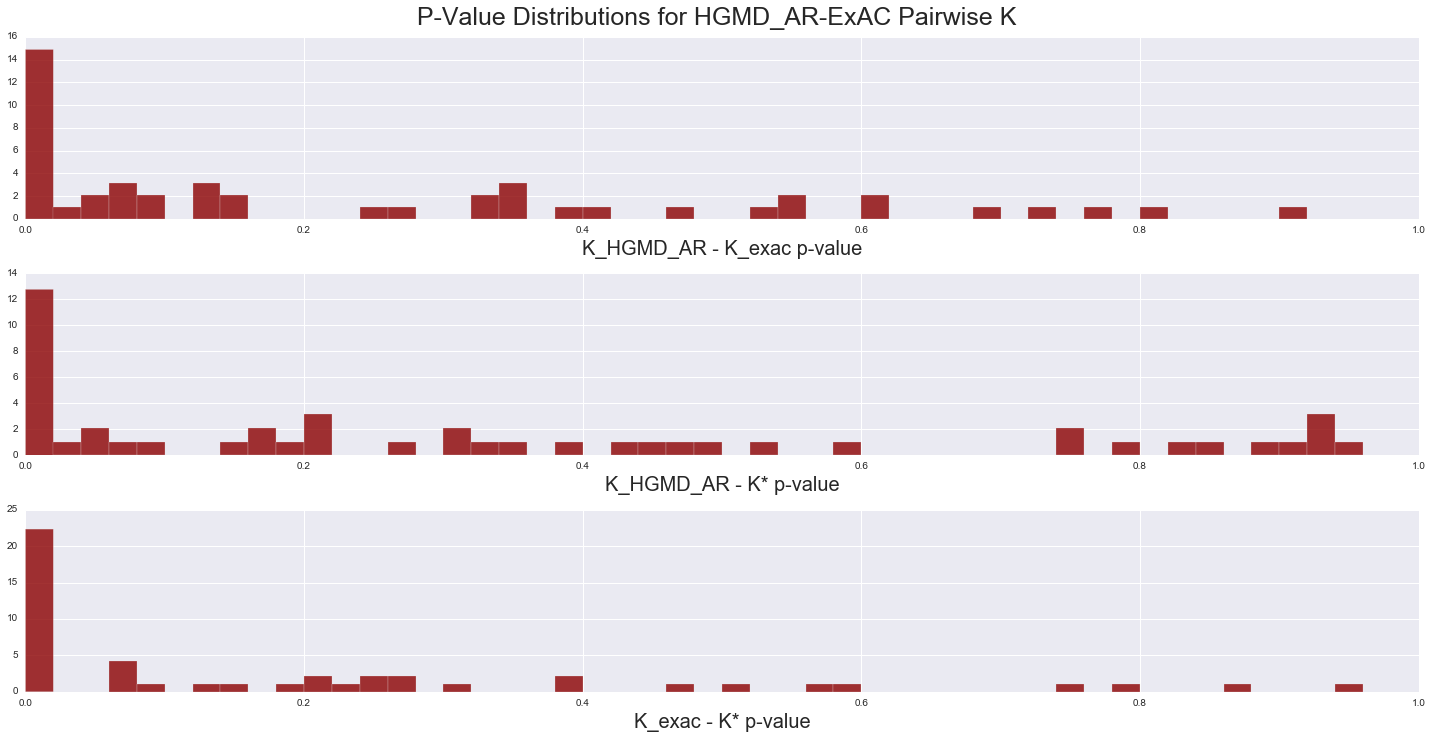

In [42]:
# P-Value Distributions
fig,ax = plt.subplots(3,1,figsize=(20,10))
plt.suptitle("P-Value Distributions for HGMD_AR-ExAC Pairwise K",fontsize=25,y=1.02)

ax[0].set_xlabel("K_HGMD_AR - K_exac p-value",fontsize=20)
# ax[0].hist(D["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[0].hist(D["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
#ax[0].plot(D_lam,D_pi,lw=3,c='cornflowerblue')

ax[1].set_xlabel("K_HGMD_AR - K* p-value",fontsize=20)
# ax[1].hist(KAD["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[1].hist(KAD["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
#ax[1].plot(KAD_lam,KAD_pi,lw=3,c='cornflowerblue')

ax[2].set_xlabel("K_exac - K* p-value",fontsize=20)
# ax[2].hist(KBD["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[2].hist(KBD["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
#ax[2].plot(KBD_lam,KBD_pi,lw=3,c='cornflowerblue')

plt.tight_layout()
plt.show()

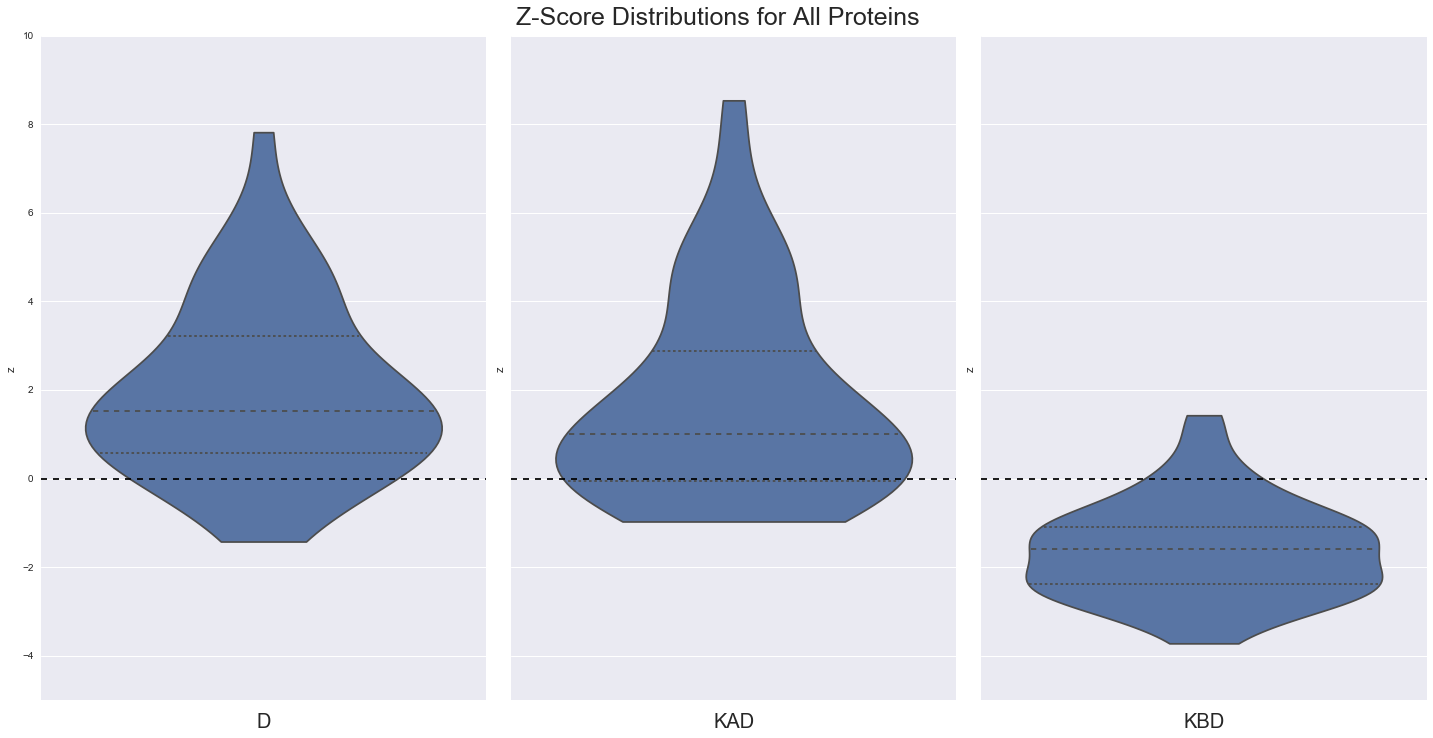

In [43]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D['z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.violinplot(KAD['z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.violinplot(KBD['z'],ax=ax[2],cut=0,orient='v',inner='quart')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,10])
plt.suptitle("Z-Score Distributions for All Proteins",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

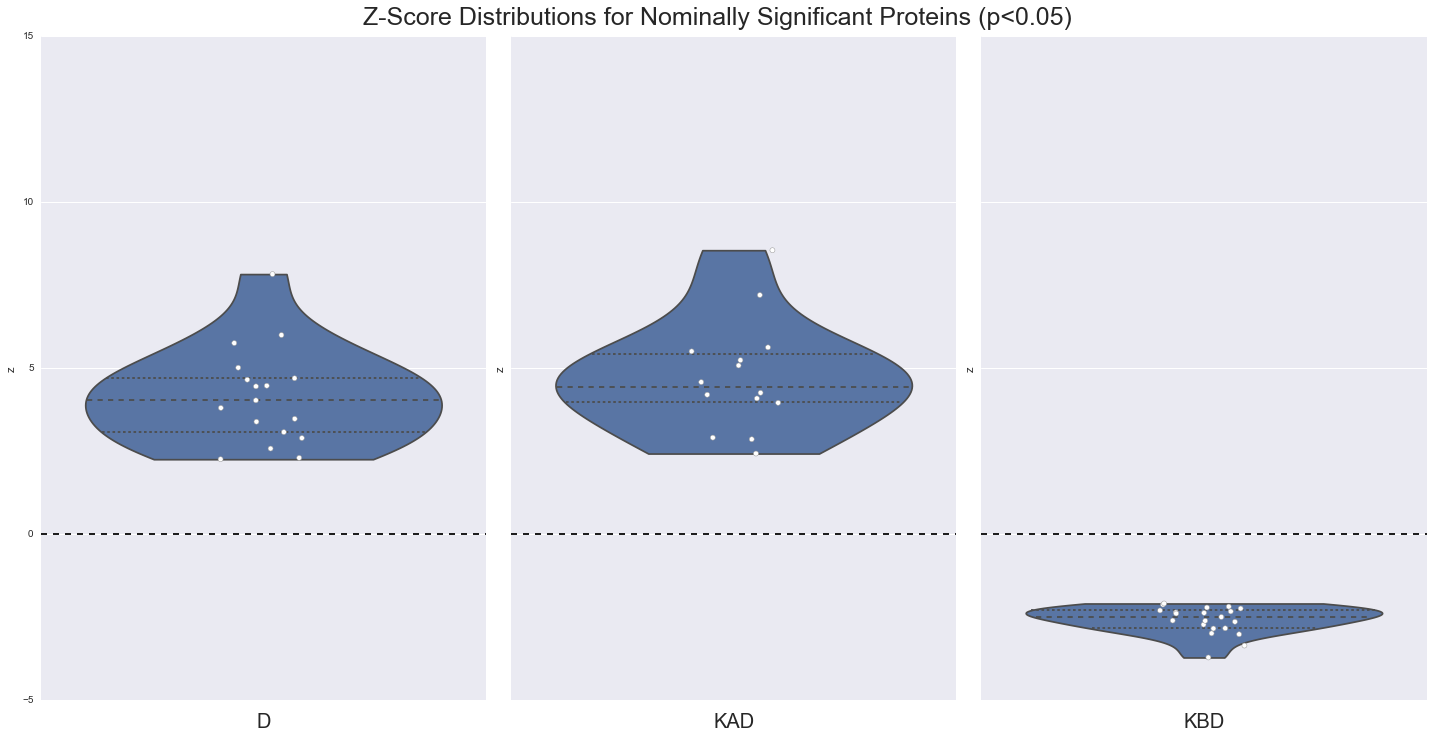

In [44]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[  D['p']<0.05,'z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.stripplot(   D.ix[  D['p']<0.05,'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['p']<0.05,'z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.stripplot( KAD.ix[KAD['p']<0.05,'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['p']<0.05,'z'],ax=ax[2],cut=0,orient='v',inner='quart')
sns.stripplot( KBD.ix[KBD['p']<0.05,'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,15])
plt.suptitle("Z-Score Distributions for Nominally Significant Proteins (p<0.05)",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

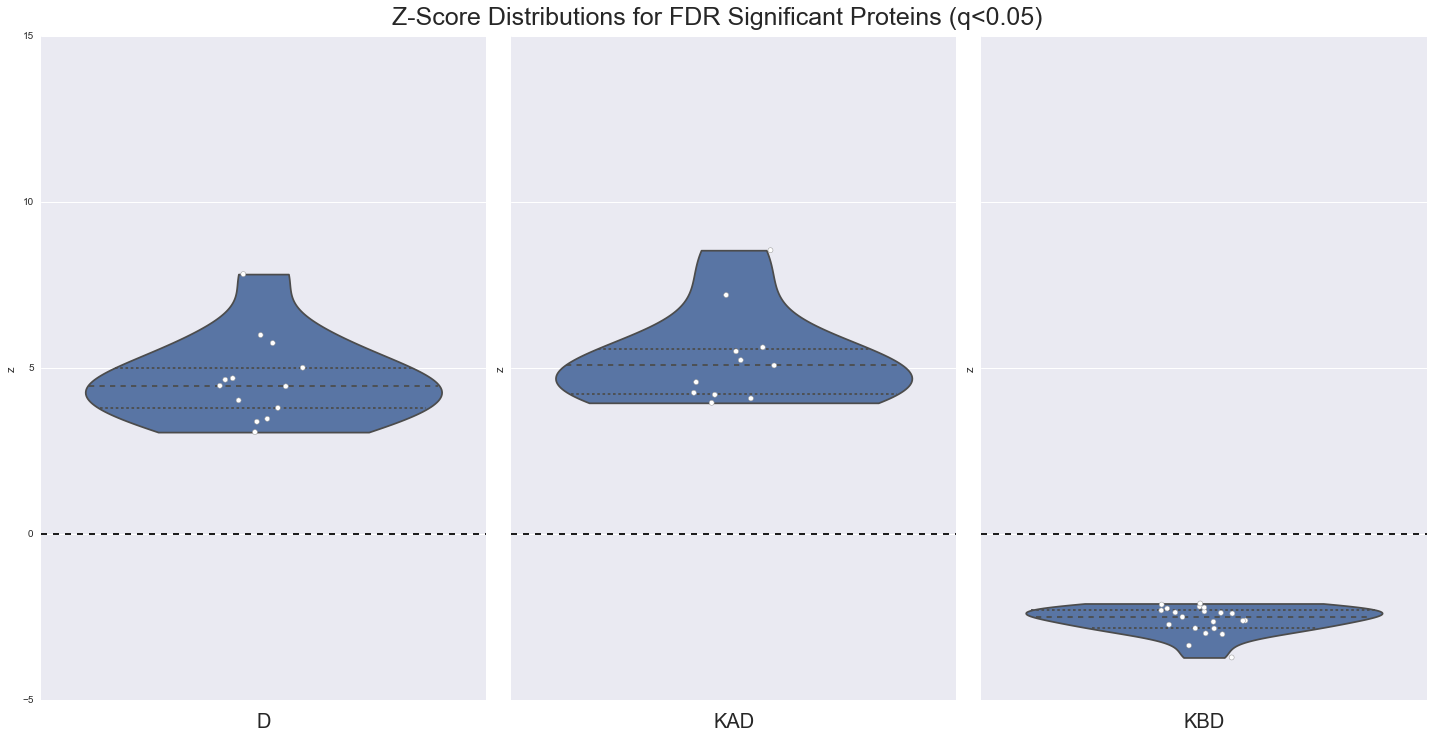

In [45]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[  D['q']<FDRTHRESH,'z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.stripplot(   D.ix[  D['q']<FDRTHRESH,'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['q']<FDRTHRESH,'z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.stripplot( KAD.ix[KAD['q']<FDRTHRESH,'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['q']<FDRTHRESH,'z'],ax=ax[2],cut=0,orient='v',inner='quart')
sns.stripplot( KBD.ix[KBD['q']<FDRTHRESH,'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,15])
plt.suptitle("Z-Score Distributions for FDR Significant Proteins (q<%.2f)"%FDRTHRESH,fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

In [46]:
# Identify the FDR-significant proteins
print "FDR-Significant Difference in Clustered-ness:"
print D.ix[D['q']<FDRTHRESH,["sid","chain","p","z","q"]].sort_values(by="z")

print "\nFDR-Significant K_HGMD_AR - K_HGMD_AR,exac"
print KAD.ix[KAD['q']<FDRTHRESH,["sid","chain","p","z","q"]].sort_values(by="z")

print "\nFDR-Significant K_exac - K_HGMD_AR,exac"
print KBD.ix[KBD['q']<FDRTHRESH,["sid","chain","p","z","q"]].sort_values(by="z")

FDR-Significant Difference in Clustered-ness:
     sid chain        p         z         q
16  2YOB     A  0.00534  3.064640  0.020915
9   3GXM     A  0.00038  3.378028  0.002551
1   3HVE     A  0.00878  3.464685  0.031743
42  3PDF     A  0.00158  3.793290  0.007426
26  4L3V     B  0.00002  4.021261  0.000313
2   2I3C     A  0.00016  4.442745  0.001504
8   4CDG     B  0.00220  4.461532  0.009400
45  1EKG     A  0.00046  4.642900  0.002702
5   2J6L     F  0.00028  4.686205  0.002193
6   2GK1     G  0.00004  5.004956  0.000470
40  4FDJ     A  0.00002  5.746846  0.000313
19  4A11     B  0.00066  5.988330  0.003447
30  3K71     D  0.00002  7.824280  0.000313

FDR-Significant K_HGMD_AR - K_HGMD_AR,exac
     sid chain        p         z         q
42  3PDF     A  0.00372  3.946829  0.017484
26  4L3V     B  0.00134  4.079365  0.007207
9   3GXM     A  0.00062  4.190606  0.005237
8   4CDG     B  0.00420  4.249449  0.017945
2   2I3C     A  0.00078  4.570911  0.005237
6   2GK1     G  0.00054  5.071

In [47]:
# Look for significant segregation
sigKAD = KAD.ix[(KAD['q']<FDRTHRESH) & (KAD['z']>0),["sid","chain"]]
sigKBD = KBD.ix[(KBD['q']<FDRTHRESH) & (KBD['z']>0),["sid","chain"]]
print "Proteins with co-occuring, significant K1-K* and K2-K*"
for t in set([(s,c) for _,s,c in sigKAD.itertuples()]).intersection([(s,c) for _,s,c in sigKBD.itertuples()]):
    print "%s\t%s"%t

Proteins with co-occuring, significant K1-K* and K2-K*


In [48]:
# Look for significant overlap
sigKAD = KAD.ix[(KAD['q']<FDRTHRESH) & (KAD['z']<0),["sid","chain"]]
sigKBD = KBD.ix[(KBD['q']<FDRTHRESH) & (KBD['z']<0),["sid","chain"]]
print "Proteins with co-occuring, significant K1-K* and K2-K*"
for t in set([(s,c) for _,s,c in sigKAD.itertuples()]).intersection([(s,c) for _,s,c in sigKBD.itertuples()]):
    print "%s\t%s"%t

Proteins with co-occuring, significant K1-K* and K2-K*


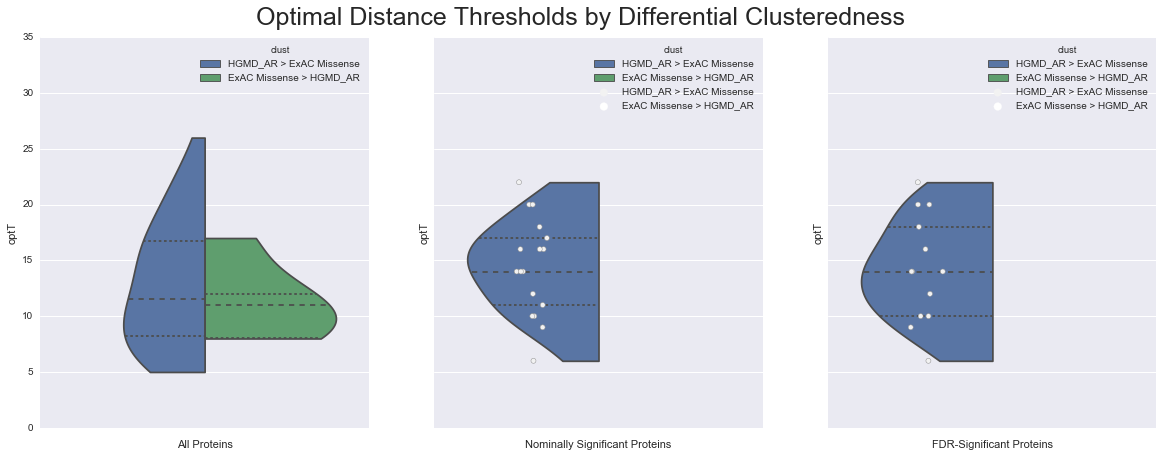

In [49]:
fig,ax = plt.subplots(1,3,figsize=(20,7),sharey=True)
df = D.copy()
ho = ['HGMD_AR > ExAC Missense','ExAC Missense > HGMD_AR']
df.ix[df['z']>0.,'clust'] = 'HGMD_AR > ExAC Missense'
df.ix[df['clust'].isnull(),'clust'] = 'ExAC Missense > HGMD_AR'
df[''] = ''
plt.suptitle("Optimal Distance Thresholds by Differential Clusteredness",fontsize=25,y=.96)
sns.violinplot(x='',y='optT',hue='clust',data=df,split=True,cut=0,ax=ax[0],inner='quart',hue_order=ho)
ax[0].set_xlabel("All Proteins")
sns.violinplot(x='',y='optT',hue='clust',data=df[df['p']<0.05],split=True,cut=0,ax=ax[1],inner='quart',hue_order=ho)
sns.stripplot(x='',y='optT',hue='clust',data=df[df['p']<0.05],split=True,orient='v',jitter=True,lw=0.5,color='white',hue_order=ho,ax=ax[1])
ax[1].set_xlabel("Nominally Significant Proteins")
sns.violinplot(x='',y='optT',hue='clust',data=df[df['q']<FDRTHRESH],split=True,cut=0,ax=ax[2],inner='quart',hue_order=ho)
sns.stripplot(x='',y='optT',hue='clust',data=df[df['q']<FDRTHRESH],split=True,orient='v',jitter=True,lw=0.5,color='white',hue_order=ho,ax=ax[2])
ax[2].set_xlabel("FDR-Significant Proteins")
plt.ylim([0,35])
plt.show()